<a href="https://colab.research.google.com/github/thecognifly/AIYVisionKit_Utils/blob/master/Darth_Vader_Annotate_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[After converting the videos captured using the RPI](https://github.com/thecognifly/AIYVisionKit_Utils/blob/master/Darth_Vader_Convert_RPI_Videos_2_PNG_images.ipynb), I will annotate the images using [colab_utils](https://github.com/ricardodeazambuja/colab_utils) label_image.

In [1]:
!pip install git+git://github.com/ricardodeazambuja/colab_utils.git --upgrade

  Cloning git://github.com/ricardodeazambuja/colab_utils.git to /tmp/pip-req-build-eylq68vm
  Running command git clone -q git://github.com/ricardodeazambuja/colab_utils.git /tmp/pip-req-build-eylq68vm
  Created wheel for colab-utils: filename=colab_utils-0.2-cp36-none-any.whl size=19461 sha256=f0571999ab304acb50b8f8026aa7d67054f80ecb4578826da62d78b6d6502cd7
  Stored in directory: /tmp/pip-ephem-wheel-cache-lnj1_qyj/wheels/21/75/32/38aeb76b2424385f43eae9fd28c98e084308f4f6d9cb0a4f97
Successfully built colab-utils


In [4]:
from colab_utils import labelImage, imshow, showAnnotations

To make life easier, I saved all the photos directly to my google drive. It's very easy to mount it inside colab:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The dataset is in my drive's root dir under "Datasets/DarthVader" and this is how we access from colab:

In [ ]:
cd "/content/drive/My Drive/Datasets/DarthVader"

/content/drive/My Drive/Datasets/DarthVader


In [ ]:
ls *.png

darthvader100.png  darthvader29.png  darthvader52.png  darthvader76.png
darthvader101.png  darthvader2.png   darthvader53.png  darthvader78.png
darthvader103.png  darthvader30.png  darthvader54.png  darthvader79.png
darthvader104.png  darthvader31.png  darthvader56.png  darthvader7.png
darthvader105.png  darthvader32.png  darthvader57.png  darthvader80.png
darthvader106.png  darthvader34.png  darthvader58.png  darthvader81.png
darthvader10.png   darthvader35.png  darthvader59.png  darthvader83.png
darthvader12.png   darthvader36.png  darthvader5.png   darthvader84.png
darthvader13.png   darthvader37.png  darthvader60.png  darthvader85.png
darthvader14.png   darthvader38.png  darthvader61.png  darthvader86.png
darthvader15.png   darthvader39.png  darthvader62.png  darthvader88.png
darthvader16.png   darthvader3.png   darthvader63.png  darthvader89.png
darthvader17.png   darthvader40.png  darthvader64.png  darthvader8.png
darthvader18.png   darthvader41.png  darthvader65.png  darthvader9

In [ ]:
img_list = !ls *.png| sort -V # ls -1v does the same job as sort, but it may not work on macs...
img_list[:12] # to show the first 13 filenames

['darthvader1.png',
 'darthvader2.png',
 'darthvader3.png',
 'darthvader4.png',
 'darthvader5.png',
 'darthvader6.png',
 'darthvader7.png',
 'darthvader8.png',
 'darthvader9.png',
 'darthvader10.png',
 'darthvader12.png',
 'darthvader13.png']

[In this notebook](https://github.com/ricardodeazambuja/colab_utils/blob/master/Testing_colab_utils.ipynb) you can see examples of how to use the stuff from colab_utils. If you are not sure, just type in an empty cell the name of the function / method and ? like this:

In [6]:
labelImage?


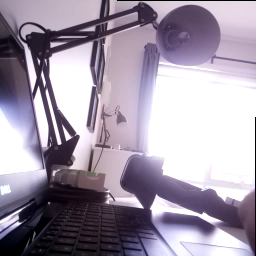

<IPython.core.display.Javascript object>

In [ ]:
annotations = {}
for img in img_list:
  tmp = labelImage(img, deleteAfter=True, scale=2)
  tmp[0][-1] = 'darthvader' # My example has only one Darth Vader per image,
                            # so I don't need to type the class while annotating...
  annotations[img] = tmp

In [ ]:
[annotations[k] for k in list(annotations.keys())[:10]]

[[[[0.46484375, 0.57421875, 0.49609375, 0.322265625], 'darthvader']],
 [[[0.419921875, 0.599609375, 0.517578125, 0.328125], 'darthvader']],
 [[[0.478515625, 0.71875, 0.517578125, 0.279296875], 'darthvader']],
 [[[0.416015625, 0.5234375, 0.5625, 0.4609375], 'darthvader']],
 [[[0.244140625, 0.33984375, 0.71875, 0.65625], 'darthvader']],
 [[[0.263671875, 0.57421875, 0.509765625, 0.416015625], 'darthvader']],
 [[[0.220703125, 0.283203125, 0.541015625, 0.69140625], 'darthvader']],
 [[[0.341796875, 0.27734375, 0.55859375, 0.697265625], 'darthvader']],
 [[[0.46484375, 0.310546875, 0.46875, 0.630859375], 'darthvader']],
 [[[0.263671875, 0.4453125, 0.357421875, 0.501953125], 'darthvader']]]

The cell below will save the annotations in a JSON file (that's why it's commented):

In [ ]:
# filename = "/content/drive/My Drive/Datasets/DarthVader/annotations.json"
# with open(filename, 'w') as f:
#   json.dump(annotations, f)

A JSON file is a text file, very easy to ready. Have a look what is inside the file you saved above:

In [ ]:
cat "/content/drive/My Drive/Datasets/DarthVader/annotations.json"

{"darthvader1.png": [[[0.46484375, 0.57421875, 0.49609375, 0.322265625], "darthvader"]], "darthvader2.png": [[[0.419921875, 0.599609375, 0.517578125, 0.328125], "darthvader"]], "darthvader3.png": [[[0.478515625, 0.71875, 0.517578125, 0.279296875], "darthvader"]], "darthvader4.png": [[[0.416015625, 0.5234375, 0.5625, 0.4609375], "darthvader"]], "darthvader5.png": [[[0.244140625, 0.33984375, 0.71875, 0.65625], "darthvader"]], "darthvader6.png": [[[0.263671875, 0.57421875, 0.509765625, 0.416015625], "darthvader"]], "darthvader7.png": [[[0.220703125, 0.283203125, 0.541015625, 0.69140625], "darthvader"]], "darthvader8.png": [[[0.341796875, 0.27734375, 0.55859375, 0.697265625], "darthvader"]], "darthvader9.png": [[[0.46484375, 0.310546875, 0.46875, 0.630859375], "darthvader"]], "darthvader10.png": [[[0.263671875, 0.4453125, 0.357421875, 0.501953125], "darthvader"]], "darthvader12.png": [[[0.2578125, 0.451171875, 0.404296875, 0.5078125], "darthvader"]], "darthvader13.png": [[[0.306640625, 0.4

Now, considering you restarted the notebook for some reason and just want to read the json file saved earlier to test:

In [ ]:
import json

filename = "/content/drive/My Drive/Datasets/DarthVader/annotations.json"
with open(filename, 'r') as f:
  read_annotations = json.load(f)

In [ ]:
[read_annotations[k] for k in list(read_annotations.keys())[:10]]

[[[[0.46484375, 0.57421875, 0.49609375, 0.322265625], 'darthvader']],
 [[[0.419921875, 0.599609375, 0.517578125, 0.328125], 'darthvader']],
 [[[0.478515625, 0.71875, 0.517578125, 0.279296875], 'darthvader']],
 [[[0.416015625, 0.5234375, 0.5625, 0.4609375], 'darthvader']],
 [[[0.244140625, 0.33984375, 0.71875, 0.65625], 'darthvader']],
 [[[0.263671875, 0.57421875, 0.509765625, 0.416015625], 'darthvader']],
 [[[0.220703125, 0.283203125, 0.541015625, 0.69140625], 'darthvader']],
 [[[0.341796875, 0.27734375, 0.55859375, 0.697265625], 'darthvader']],
 [[[0.46484375, 0.310546875, 0.46875, 0.630859375], 'darthvader']],
 [[[0.263671875, 0.4453125, 0.357421875, 0.501953125], 'darthvader']]]

Finally, colab_utils also has a way to visualize the annotations!

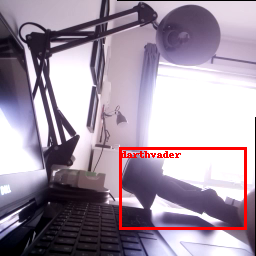

In [ ]:
i = 0

filename = img_list[i]
showAnnotations(filename,read_annotations[filename], color='red', line_width=3)